In [1]:
import numpy as np
from sklearn.pipeline import Pipeline
from python.utils import load_data, get_features_from 
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_validate, GridSearchCV
from python.features_extraction import ExtractFeatures
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

/home/julien/miniconda3/envs/AI/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/julien/miniconda3/envs/AI/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/julien/miniconda3/envs/AI/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/julien/miniconda3/envs/AI/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
fc_parameters = {
    "abs_energy": None,
    "maximum": None,
    "absolute_sum_of_changes": None,
    "fft_coefficient": [{"coeff": 10, "attr": "abs"}],
    "fourier_entropy": [{"bins": 10}],
    "linear_trend": [{"attr": "slope"}],
    "mean": None,
    "number_peaks": [{"n":4}],
    "variance": None,
}

In [4]:
DATA_PATH = 'data'
X_train, y_train, X_test, subjects = load_data(DATA_PATH)

X_train size: (3500, 15872).
y_train size: (3500,).
X_test size: (3500, 15872).


In [5]:
pre_process = Pipeline([
    ("si", SimpleImputer(missing_values=-999999.99, strategy="mean")),
    ("pp", ExtractFeatures(fc_parameters)),
    ("si2", SimpleImputer(missing_values=np.nan, strategy="mean")),
    ("ss", StandardScaler())
])

In [6]:
rf_clf = Pipeline([
    ("pp", pre_process),
    ("rnf_cls", RandomForestClassifier(random_state=42, n_estimators=500, max_features=4,max_depth=15,max_samples=0.4, bootstrap=True))
])

# Scoring

In [7]:
cv_res = cross_validate(rf_clf, X_train, y_train, groups=subjects, cv=GroupKFold(len(np.unique(subjects))), return_train_score=True, n_jobs=1, scoring="accuracy")
cv_res["test_score"].mean()

Feature Extraction: 100%|██████████| 20/20 [00:03<00:00,  6.56it/s]


0.7926448843044637

# Grid-search

In [ ]:
param_grid = [
    {'rnf_cls__bootstrap': [True, False], "rnf_cls__max_features": [2, 4, "auto"], "rnf_cls__max_depth": [10, 15, None], "rnf_cls__max_samples":[None, 0.2, 0.4, 0.6, 0.8]}
]

gs = GridSearchCV(rf_clf, param_grid, cv=GroupKFold(len(np.unique(subjects))), n_jobs=2)
gs.fit(X_train, y_train, groups=subjects)
cvres = gs.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

In [52]:
#test for RF
estimator_nb=[50,100,200,300,400,800,1000]
score_true=np.zeros(7)
score_false=np.zeros(7)
for k in range(0,len(score_true)):
    feature_extract_model = Pipeline([
    ("pp", pre_process),
    ("rnf_cls", RandomForestClassifier(random_state=42,n_estimators=estimator_nb[k], max_features=4,max_depth=15,max_samples=0.4, bootstrap=True))
])
    
    cv_res = cross_validate(feature_extract_model, X_train, y_train, groups=subjects, cv=GroupKFold(len(np.unique(subjects))), return_train_score=True,scoring="accuracy")
    score_true[k] = cv_res["test_score"].mean()

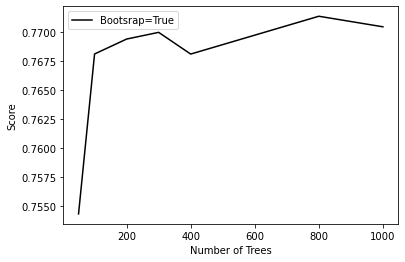

In [53]:
#RF plots
plt.plot(estimator_nb,score_true,color='k',label='Bootsrap=True')
plt.legend()
plt.ylabel('Score')
plt.xlabel('Number of Trees')
plt.show()